In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score


#Loading the data set
df = pd.read_csv("Iris_data_sample.csv", index_col=0, na_values=["??","###"])

#Initial view of the dataset
print(df.head())

#Checking for missing values
print(df.isnull().sum())

#Summary of statistics
print(df.describe())


   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
1            5.1           3.5            1.4           0.2  Iris-setosa
2            4.9           NaN            1.4           0.2          NaN
3            4.7           3.2            1.3           0.2  Iris-setosa
4            NaN           3.1            1.5           0.2  Iris-setosa
5            5.0           3.6            NaN           0.2  Iris-setosa
SepalLengthCm    1
SepalWidthCm     1
PetalLengthCm    2
PetalWidthCm     0
Species          1
dtype: int64
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     149.000000    149.000000     148.000000    150.000000
mean        5.851678      3.054362       3.788514      1.198667
std         0.824507      0.435034       1.757260      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.400000      1.300000
75%   

In [2]:
#Copying  the data set and handling missing values 
data = df.copy()
print(data["Species"].value_counts())
data = data.apply(lambda col: col.fillna(col.mean()) if col.dtype == "float64" else col.fillna(col.mode()[0]))
#Again chaecking the missing values after handling
print(data.isnull().sum())


Species
Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: count, dtype: int64
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [6]:
# Splitting the feautures and the target
X = data.drop("Species",axis = 1)
y = data["Species"]

# Splitting the data set into training and testing model
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

# Standardizing the data set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the model using logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)
log_y_pred =model.predict(X_test)
print(log_y_pred)

# Confusion matrix and Classification report 
log_cm = confusion_matrix(y_test,log_y_pred)
log_accuracy =accuracy_score(y_test,log_y_pred)
print(log_cm)
print(log_accuracy)


['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
1.0


In [ ]:
# Training the KNN model
classifier = KNeighborsClassifier(n_neighbors= 5)
classifier.fit(X_train, y_train)
knn_y_pred = classifier.predict(X_test)

# Confusion matrix and Classification report for KNN model
print(classification_report(y_test,knn_y_pred))
knn_cm = confusion_matrix(y_test,knn_y_pred)
knn_accuracy = accuracy_score(y_test, knn_y_pred)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30




**Model Comparison:**
Logistic Regression Accuracy: 1.0000
KNN Accuracy: 1.0000


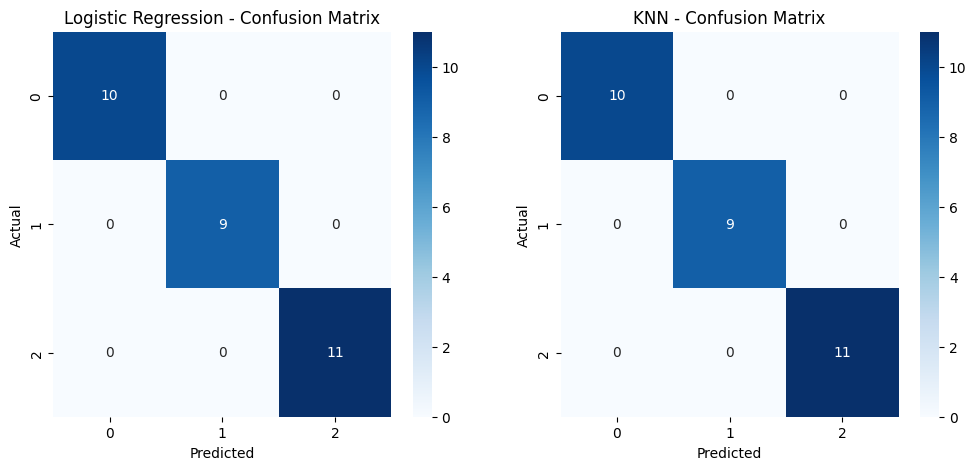

In [5]:
# Comaparision of both the models
print("\n**Model Comparison:**")
print(f"Logistic Regression Accuracy: {log_accuracy:.4f}")
print(f"KNN Accuracy: {knn_accuracy:.4f}")

# Visualization of Logistic and KNN models
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(log_cm, annot=True, fmt='d', cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression - Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")


sns.heatmap(knn_cm, annot=True, fmt='d', cmap="Blues", ax=axes[1])
axes[1].set_title("KNN - Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.show()